# Names and IDs
 1. Chen Harel 205566292
 2. Omer Rosenberg 315328898

# I. Condorcet's Jury Theorem (1785)

Assume voter probability to be correct as $p>.5$.

1. Plot the probability a jury of $n$ voters (odd) is correct as a function of $p$ for different $n$ using Monte-Carlo simulations (sampling and averaging).

2. Prove that as number of jury members grows, $n\rightarrow\infty$, the  jury majority becomes correct  $\Pr(\text{correct}) \rightarrow 1$ (**hint**: use the law of large numbers).

Notes: Avoid loops where possible.

# Question 1.1

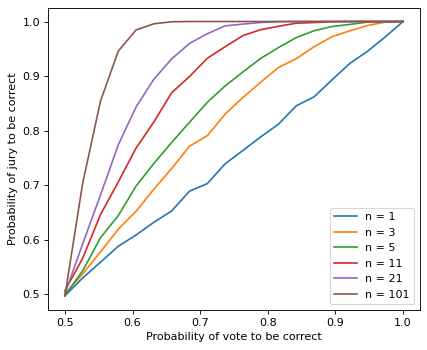

In [2]:
#Question 1.1
import numpy as np
import matplotlib.pyplot as plt

#helper function, recieves num judges and generate an array of random votes
def simulation(n):
    votes = np.random.rand(n)
    return votes

#setup and parameters
p_jumps = 20
ns = [1,3,5,11,21,101]
curves = np.zeros((len(ns), p_jumps))
ps = np.linspace(0.5, 1, p_jumps)
iterations = 10000

#curves calculation
for n_index in range(len(ns)): #iterate over jury sizes
  jury_size = ns[n_index]
  for p_index in range(ps.shape[0]): #iterate over probabilities of single judge to bre correct (x-axis)
    verdicts = np.zeros(iterations)
    prob = ps[p_index]
    for i in range(iterations): #iterations - number of simulations to generate
      votes = np.greater(np.full(jury_size , prob), simulation(jury_size))
      verdicts[i] = np.round(np.divide(np.count_nonzero(votes), jury_size)) 
    curves[n_index][p_index] = np.mean(verdicts)

#PLOT
plt.figure(figsize=(6, 5), dpi=80)
for curve_index in range(len(ns)):
  plt.plot(ps , curves[curve_index], label = "n = "+ str(ns[curve_index]))
plt.ylabel('Probability of jury to be correct')
plt.xlabel('Probability of vote to be correct')
plt.legend()
plt.show()






# Question 1.2
**The Condorect's Theorem**\
Assumptions \
**Firstly**, that individual votes $X_i...X_n$ ,are all independent one to another. \
**Secondly**, that each voter makes the right decision with probability of $p>0.5$ \
we would like to prove that when $n\rightarrow \infty$ the probability of the jury to be correct tend to be $1$. \
**Proof:** Let $a=p-\frac{1}{2}>0$. \
because the value of a vote can be $\pm 1$, we can assume without loss of generality that the correct answer is $+1$. \

Then we can say that: $EX_1 = +1*(\frac{1}{2}+a)-1*(\frac{1}{2}-a)=2a$, 
where $EX_1$ is the expected value of $X$ to be $1$. \
\
By the weak law of the large numbers which states that $\bar{X_n}$  converge in probability towards the expected value of $EX_1 = 2a$ when $n \rightarrow \infty $.

we'll show that for any $ϵ_1,ϵ_2 > 0$
there is $N$ large enough such that for every $n\geq N$ ,$P(|\bar{X_n}-EX_1|<ϵ_1)>1-ϵ_2.$ \
Let's take $ϵ_1$ to be $2a$ we can see that the probability of jury to be correct is: \
$P(X_1 + X_2 +...+ X_n>0)=P\Big(\bar{X_n}>0\Big) \geq P\Big(|\bar{X_n}-2a|<2a\Big)\rightarrow 1$

# II. AdaBoost
* Use `AdaBoostClassifier` model from sklearn.ensemble to find a strong classifier on the sample set given below, using $n$ weak learners:
    - For the base weak learners, use a ***linear*** SVM classifier (use `LinearSVC` from sklearn.svm) with the next parameters:
        - *tol=1e-10,loss='hinge', C=1000, max_iter=50000*
    - Split the sample set into 2/3rd train set and 1/3 test set.
    - Train ensemble classifiers where each has a different number of estimators $n\in \{1, 3, 10, 50, 100, 1000, 10000\}$.
    - Use the given function plot_data or your own function to plot the final decision plane of each ensemble model.

* Answer to the next questions:

 1. How does the overall train set accuracy change with $n$?
 2. Does your model start to overfit at some point? How can you test and detect such a point?
 3. For this specific task, what is the optimal number of estimators? Hint: use `estimator_errors_` attribute.

 ---
 **Note1:** 
 1. If ***linearSVC*** doesn't work, you can use ***SVC*** with: `kernel='linear'` and `probability=True`.
 2. Explain you results in text and support it with figures.

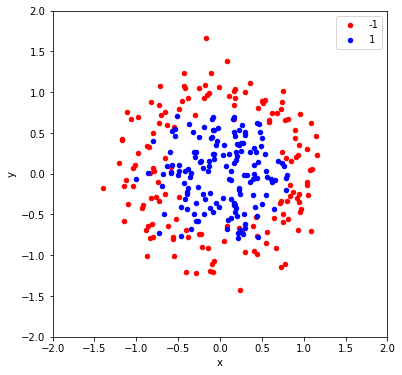

In [3]:
from sklearn.datasets import make_circles
from matplotlib import pyplot as plt
from pandas import DataFrame

# generate 2d classification dataset
X, y = make_circles(n_samples=300, noise=0.2, random_state=101, factor=0.5)
y = y*2 - 1
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {-1:'red', 1:'blue'}
fig, ax = plt.subplots(figsize=(6,6))
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.show()

In [4]:
def plot_data(X, y, h, ax):
    '''Plotting function. The function will plot the given instances as well will color the
    background according to the decision boundaries of the model.
    X - 2D array
    y - Vector of labels
    h - A function which accepts X and returns the predicted labels. It should be based on the trained model.
    ax - axes.Axes object as returned by matplotlib.pyplot.subplots function.'''
    def make_meshgrid(x, y, h=.01):
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
        return xx, yy
  
    def plot_contours(ax, clf, xx, yy, **params):
        Z = h(np.c_[xx.ravel(), yy.ravel()])  # predictions
        Z = Z.reshape(xx.shape)
        if 'levels' in params and len(params['levels'])<2:
          out = ax.contour(xx, yy, Z, **params, colors='k', edgesize=10)
        else:
          out = ax.contourf(xx, yy, Z, **params)
        return out
  
    # scatter plot, dots colored by class value
    df = DataFrame(dict(x0=X[:,0], x1=X[:,1], label=y))
    colors = {-1:'red', 1:'blue'}
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x0', y='x1', 
                 alpha=0.5, label=key, color=colors[key])
  
    # decision boundary
    xx1, xx2 = make_meshgrid(X[:,0], X[:,1])
    plot_contours(ax, h, xx1, xx2, alpha=0.2)#, levels=[0.5])
  
    ax.axis('scaled')

# Adaboost model




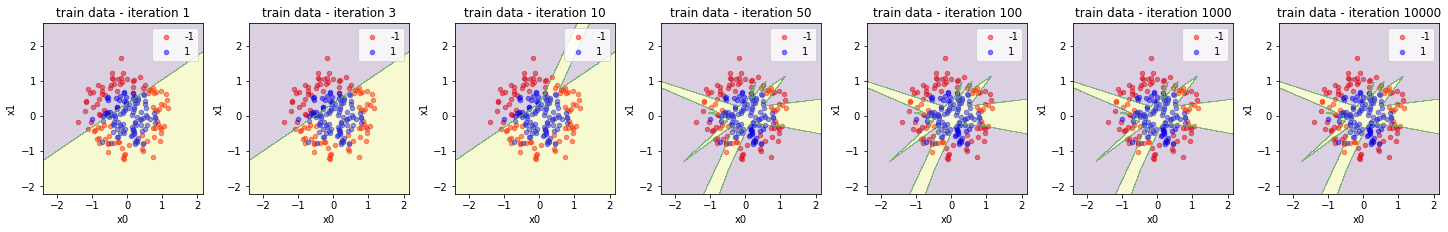

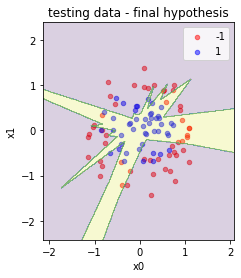

In [5]:
#PART 2 - ADABOOST
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import subplots
#Data Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state= 1234567)
fig, ax = subplots(1, 7, figsize = (20,20), constrained_layout=True)
#Models Creation
seed = 20
ns = [1,3,10,50,100,1000,10000]
svm_clf = LinearSVC(tol=1e-10,loss='hinge', C=1000, max_iter=50000)
accuracy_train = []
accuracy_test = []
errors = []
for i in range(len(ns)):
  #Create Model
  abc_model = AdaBoostClassifier(svm_clf, n_estimators = ns[i], algorithm= 'SAMME', random_state= 1234567)
  #Train
  abc_model.fit(X_train, y_train)
  #Plot Final Descition 
  plot_data(X_train, y_train, lambda x: abc_model.predict(x), ax[i])
  ax[i].set_title("train data - iteration "+str(ns[i]))

  #Data obtained in order to answer the open questions
  accuracy_train.append(abc_model.score(X_train,y_train))
  accuracy_test.append(abc_model.score(X_test,y_test))
  errors.append(abc_model.estimator_errors_)
  
#plot final hypothesis
fig_test, ax_test = plt.subplots()
ax_test.set_title("testing data - final hypothesis")
plot_data(X_test, y_test, lambda x: abc_model.predict(x), ax_test)

# Your answers here


**Question 2.1** \
The accuracy over the training data stabelizes after 4 iterations, which means the number of classifiers doesnt produce more input to the algorithm. \

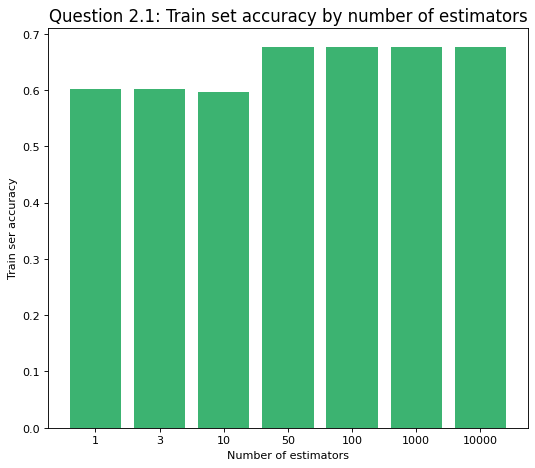

In [7]:
#Plot for Question 2.1
n_estimators = ['1','3','10','50','100','1000','10000']
fig = plt.figure(figsize=(6, 5), dpi=80)
ax = fig.add_axes([0,0,1,1])
ax.bar(n_estimators, accuracy_train,  color = 'mediumseagreen')
plt.title('Question 2.1: Train set accuracy by number of estimators', fontsize = 15)
plt.ylabel('Train ser accuracy')
plt.xlabel('Number of estimators')
plt.show()

**Question 2.2** \
We can easly detect overfitting by checking the difference between the accuracy of the model over the train and test data. \
As you can see in the chart we made below, the accuracy difference is relativily small(below 5%), which indicates that the model doesnt tend to overfitting.   \

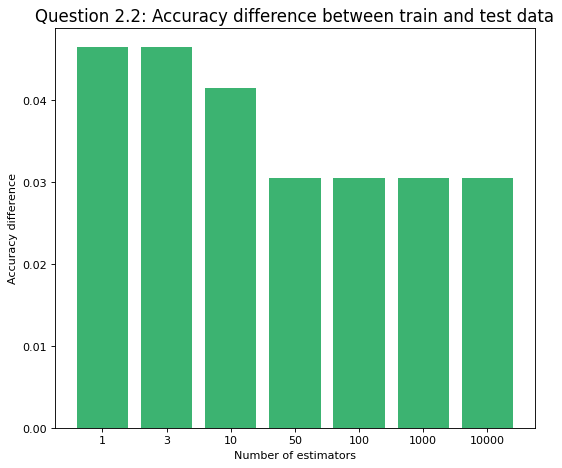

In [8]:
#Plot for Question 2.2
n_estimators = ['1','3','10','50','100','1000','10000']
accuracy_diff = [abs(accuracy_train[i] - accuracy_test[i]) for i in range(len(accuracy_train))]
fig = plt.figure(figsize=(6, 5), dpi=80)
ax = fig.add_axes([0,0,1,1])
ax.bar(n_estimators, accuracy_diff,  color = 'mediumseagreen')
plt.title('Question 2.2: Accuracy difference between train and test data', fontsize = 15)
plt.ylabel('Accuracy difference')
plt.xlabel('Number of estimators')
plt.show()

**Question 2.3** \
For this question we added the plot below that shows the classification error by the number of estimators. \
As you can see between n_estimators = 27 and 28 the classification error jumps to 1 and fixes there, so the optimal number of estimators is 28.

No handles with labels found to put in legend.


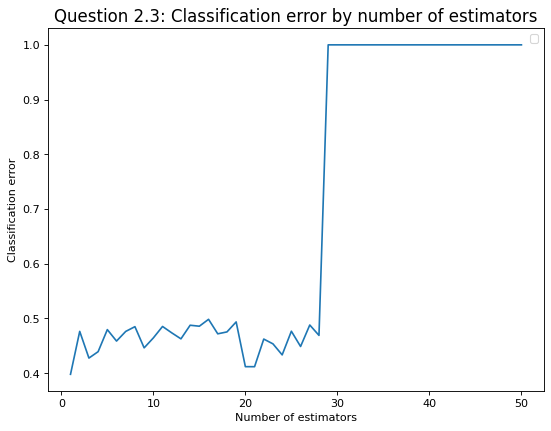

In [9]:
#Plot for Question 2.3
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(list(range(1,50+1)) , errors[3])
plt.title('Question 2.3: Classification error by number of estimators', fontsize = 15)
plt.ylabel('Classification error')
plt.xlabel('Number of estimators')
plt.legend()
plt.show()